In [3]:
import os
os.getcwd()

'/Users/rahulshelke/Documents/Data Science/EDA/BBC News Classification'

In [4]:
# importing the zipfile module 
from zipfile import ZipFile 
import os
# loading the temp.zip and creating a zip object 
with ZipFile(os.path.join(os.getcwd() ,"Dataset/learn-ai-bbc.zip"), 'r') as zObject: 
	# Extracting all the members of the zip 
	# into a specific location. 
	zObject.extractall(path=os.path.join(os.getcwd(), "Dataset")) 


In [5]:
import pandas as pd
import numpy as np

## Load the Dataset

In [6]:
DATA_PATH = os.path.join(os.getcwd(), "Dataset")

In [7]:
train_df = pd.read_csv(os.path.join(DATA_PATH, "BBC News Train.csv"))
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


## Data Columns

The "Text" column contains the textual information(input features) and the "Category" column contains the output labels. The task of any classifier is to correctly predict the "Category" given any "Text" or textual column. Hence we have to apply our data cleaning, transformation steps to the "Text" column.

## Validating the number of entries

This includes the number of entries we have in the dataset. Also we can have an analysis on the statistical aspects of the data which we will be exploring further through graphs and charts.

In [8]:
len(train_df), train_df.index.shape[-1]

(1490, 1490)

## Importing libraries 

The significant aspect is to import libraries for our use statistical analysis cases. Some of these include:

- [Sklearn](https://scikit-learn.org/stable/)
- [Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [NLTK](https://www.nltk.org/)
- wordcloud

These libraries and frameworks are efficient in handling data which can be used for initial analysis. As we progress, we will be including more libraries.



In [9]:
# for processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# for eavluation
from sklearn import preprocessing, metrics, manifold
# for features
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
# to handle imbalance cxategories
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import NearMiss

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# visualization
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline

from sklearn.preprocessing import RobustScaler
import xgboost
import string
from wordcloud import WordCloud, STOPWORDS
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [10]:
## Assess the shape of the data
print("The Shape of the Dataset".format(), train_df.shape)

The Shape of the Dataset (1490, 3)


In [11]:
train_df["Category"].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

## Statistical Analysis-I

This is the start of the analysis phase where we will first check the amount of data present in either of the categories. 
We will follow this up with some pictorial representations related to the words and frequency mappings.



In [12]:
bussiness = train_df[train_df["Category"]=="business"]["Text"]
tech = train_df[train_df["Category"]=="tech"]["Text"]
politics = train_df[train_df["Category"]=="politics"]["Text"]
sport = train_df[train_df["Category"]=="sport"]["Text"]
entertainment = train_df[train_df["Category"]=="entertainment"]["Text"]

print("First 10 samples of businees relates news samples\n".format(), bussiness[:10])
print("First 10 samples of tech relates news samples\n".format(), tech[:10])
print("First 10 samples of politics relates news samples\n".format(), politics[:10])
print("First 10 samples of sport relates news samples\n".format(), sport[:10])
print("First 10 samples of entertainment relates news samples\n".format(), entertainment[:10])

First 10 samples of businees relates news samples
 0     worldcom ex-boss launches defence lawyers defe...
1     german business confidence slides german busin...
2     bbc poll indicates economic gloom citizens in ...
4     enron bosses in $168m payout eighteen former e...
8     car giant hit by mercedes slump a slump in pro...
12    uk coal plunges into deeper loss shares in uk ...
13    bp surges ahead on high oil price oil giant bp...
25    china had role in yukos split-up china lent ru...
29    iran budget seeks state sell-offs iran s presi...
32    china continues rapid growth china s economy h...
Name: Text, dtype: object
First 10 samples of tech relates news samples
 3     lifestyle  governs mobile choice  faster  bett...
19    moving mobile improves golf swing a mobile pho...
24    bt boosts its broadband packages british telec...
26    peer-to-peer nets  here to stay  peer-to-peer ...
30    pompeii gets digital make-over the old-fashion...
39    security scares spark browser 

In [13]:
# Count of all categories text
count = train_df["Category"].value_counts()
print("Total Counts of all sets".format(), count)

Total Counts of all sets Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


In [14]:
for label, count in enumerate(dict(count)):
    print(label, count, )

0 sport
1 business
2 politics
3 entertainment
4 tech


In [15]:
dict(train_df["Category"].value_counts(ascending=False)).keys()

dict_keys(['sport', 'business', 'politics', 'entertainment', 'tech'])

<Axes: xlabel='count', ylabel='Category'>

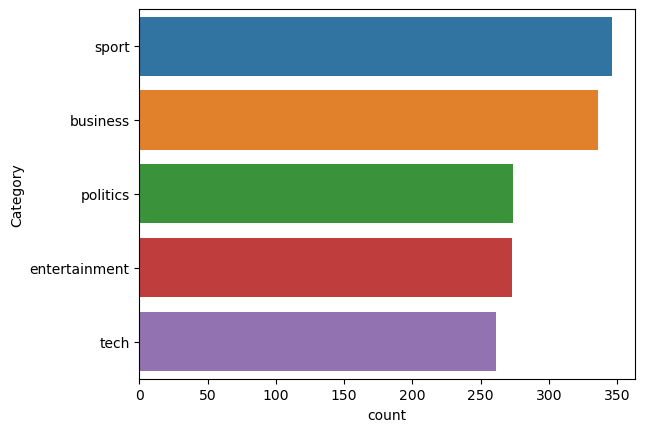

In [16]:

sns.countplot(train_df, y='Category', order=dict(train_df["Category"].value_counts(ascending=False)).keys())

In [17]:
train_df['token length']=train_df["Text"].apply(lambda x: len(x.split()))

<Axes: xlabel='token length', ylabel='Category'>

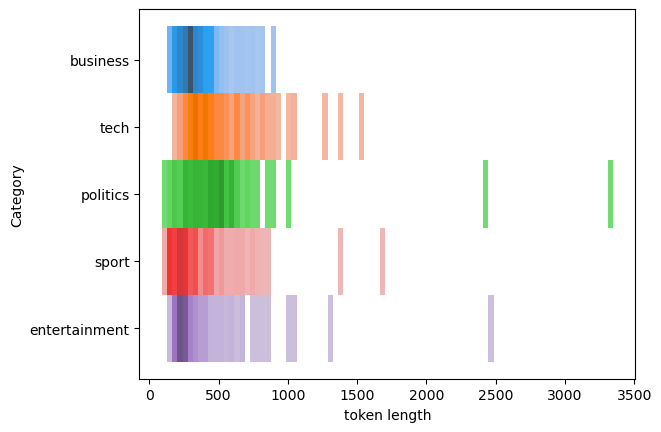

In [18]:
sns.histplot(
    train_df, x="token length", y="Category", hue="Category", legend=False
)

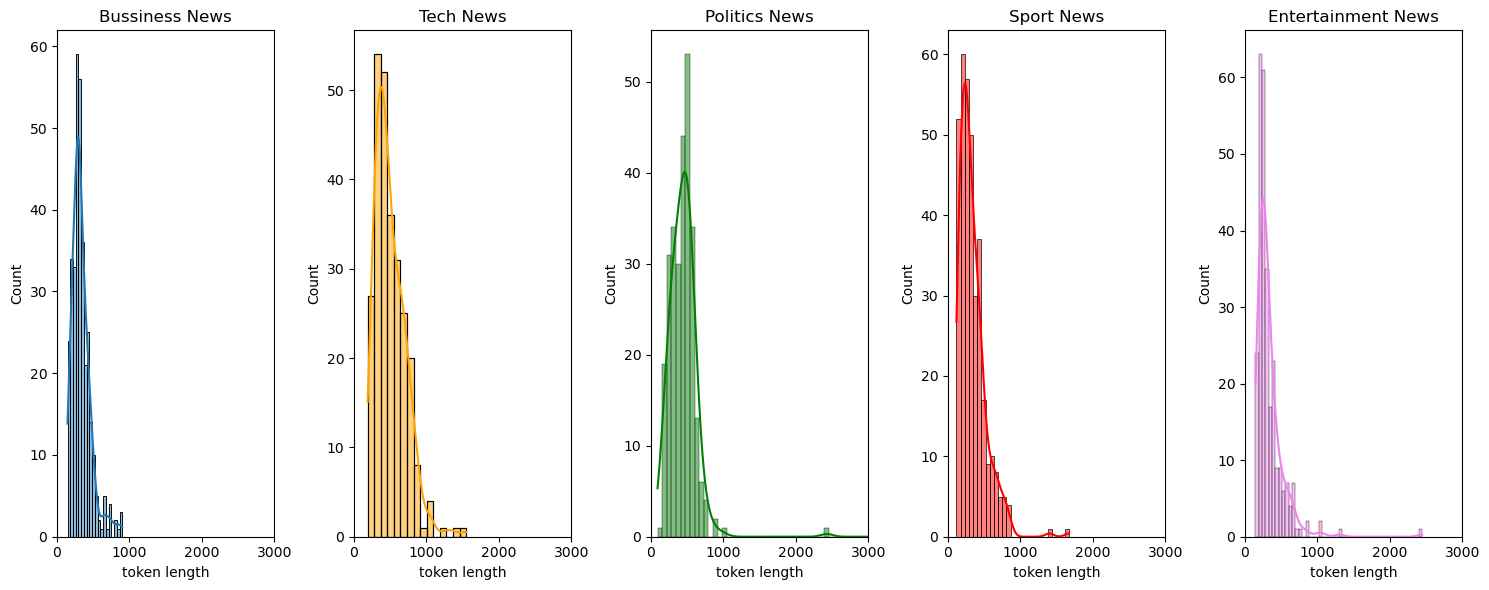

In [19]:
plt.subplots(1, 5, figsize=(15,6))
#bussiness
plt.subplot(151)
sns.histplot(data=train_df[train_df['Category'] == 'business'], x='token length', kde=True)
plt.xlim(0,3000)
plt.title('Bussiness News')

#tech
plt.subplot(152)
sns.histplot(data=train_df[train_df['Category'] == 'tech'], x='token length', kde=True, color='orange')
plt.xlim(0,3000)
plt.title('Tech News')

#politics
plt.subplot(153)
sns.histplot(data=train_df[train_df['Category'] == 'politics'], x='token length', kde=True, color='green')
plt.xlim(0,3000)
plt.title('Politics News')

#sport
plt.subplot(154)
sns.histplot(data=train_df[train_df['Category'] == 'sport'], x='token length', kde=True, color='red')
plt.xlim(0,3000)
plt.title('Sport News')

#entertainment
plt.subplot(155)
sns.histplot(data=train_df[train_df['Category'] == 'entertainment'], x='token length', kde=True, color='violet')
plt.xlim(0,3000)
plt.title('Entertainment News')

plt.tight_layout()
plt.show();

In [20]:
# Count Punctuations/Stopwords/Codes and other semantic datatypes

train_df["count_punctuations"] = train_df["Text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [21]:
train_df.describe()

,ArticleId,token length,count_punctuations
count,1490.000000,1490.000000,1490.000000
mean,1119.696644,385.012752,29.830201
std,641.826283,210.898616,18.448157
min,2.000000,90.000000,6.000000
25%,565.250000,253.000000,19.000000
50%,1112.500000,337.000000,26.000000
75%,1680.750000,468.750000,36.000000
max,2224.000000,3345.000000,216.000000


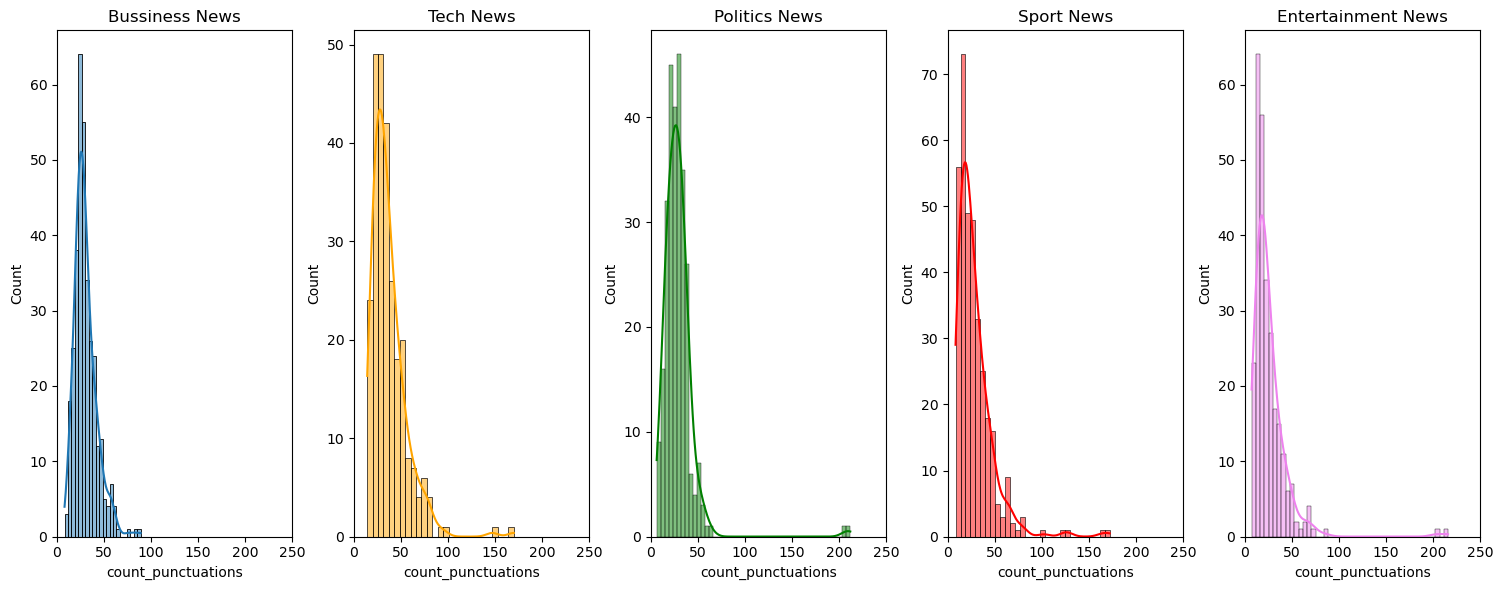

In [22]:
# punctuation counts

plt.subplots(1, 5, figsize=(15,6))
#bussiness
plt.subplot(151)
sns.histplot(data=train_df[train_df['Category'] == 'business'], x='count_punctuations', kde=True)
plt.xlim(0,250)
plt.title('Bussiness News')

#tech
plt.subplot(152)
sns.histplot(data=train_df[train_df['Category'] == 'tech'], x='count_punctuations', kde=True, color='orange')
plt.xlim(0,250)
plt.title('Tech News')

#politics
plt.subplot(153)
sns.histplot(data=train_df[train_df['Category'] == 'politics'], x='count_punctuations', kde=True, color='green')
plt.xlim(0,250)
plt.title('Politics News')

#sport
plt.subplot(154)
sns.histplot(data=train_df[train_df['Category'] == 'sport'], x='count_punctuations', kde=True, color='red')
plt.xlim(0,250)
plt.title('Sport News')

#entertainment
plt.subplot(155)
sns.histplot(data=train_df[train_df['Category'] == 'entertainment'], x='count_punctuations', kde=True, color='violet')
plt.xlim(0,250)
plt.title('Entertainment News')

plt.tight_layout()
plt.show();

In [23]:
# Analyse Stopwords

stops = set(STOPWORDS)

train_df["stop_words"] = train_df["Text"].apply(lambda z: len([w for w in str(z).split() if w in stops]))

In [24]:
train_df.describe()

,ArticleId,token length,count_punctuations,stop_words
count,1490.000000,1490.000000,1490.000000,1490.000000
mean,1119.696644,385.012752,29.830201,158.102013
std,641.826283,210.898616,18.448157,95.867152
min,2.000000,90.000000,6.000000,18.000000
25%,565.250000,253.000000,19.000000,98.000000
50%,1112.500000,337.000000,26.000000,136.000000
75%,1680.750000,468.750000,36.000000,199.000000
max,2224.000000,3345.000000,216.000000,1549.000000


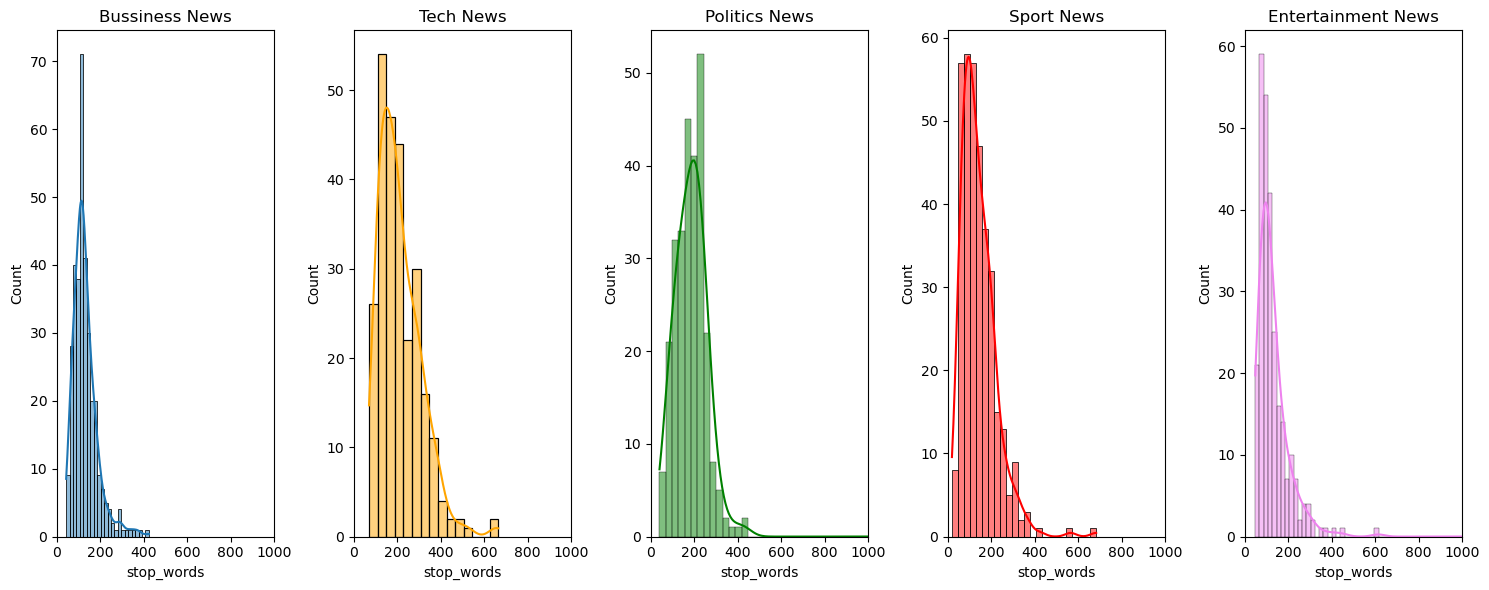

In [25]:
# punctuation counts

plt.subplots(1, 5, figsize=(15,6))
#bussiness
plt.subplot(151)
sns.histplot(data=train_df[train_df['Category'] == 'business'], x='stop_words', kde=True)
plt.xlim(0,1000)
plt.title('Bussiness News')

#tech
plt.subplot(152)
sns.histplot(data=train_df[train_df['Category'] == 'tech'], x='stop_words', kde=True, color='orange')
plt.xlim(0,1000)
plt.title('Tech News')

#politics
plt.subplot(153)
sns.histplot(data=train_df[train_df['Category'] == 'politics'], x='stop_words', kde=True, color='green')
plt.xlim(0,1000)
plt.title('Politics News')

#sport
plt.subplot(154)
sns.histplot(data=train_df[train_df['Category'] == 'sport'], x='stop_words', kde=True, color='red')
plt.xlim(0,1000)
plt.title('Sport News')

#entertainment
plt.subplot(155)
sns.histplot(data=train_df[train_df['Category'] == 'entertainment'], x='stop_words', kde=True, color='violet')
plt.xlim(0,1000)
plt.title('Entertainment News')

plt.tight_layout()
plt.show();

In [26]:
## Checking number of urls

train_df["no_of_urls"] = train_df["Text"].apply(lambda z: len([w for w in str(z).lower().split() if 'http' in w or 'https' in w]))

In [107]:
train_df.describe()

,ArticleId,token length,count_punctuations,stop_words,no_of_urls
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.0
mean,1119.696644,385.012752,29.830201,158.102013,0.0
std,641.826283,210.898616,18.448157,95.867152,0.0
min,2.000000,90.000000,6.000000,18.000000,0.0
25%,565.250000,253.000000,19.000000,98.000000,0.0
50%,1112.500000,337.000000,26.000000,136.000000,0.0
75%,1680.750000,468.750000,36.000000,199.000000,0.0
max,2224.000000,3345.000000,216.000000,1549.000000,0.0


FileNotFoundError: [Errno 2] No such file or directory: 'wordcloud.png'

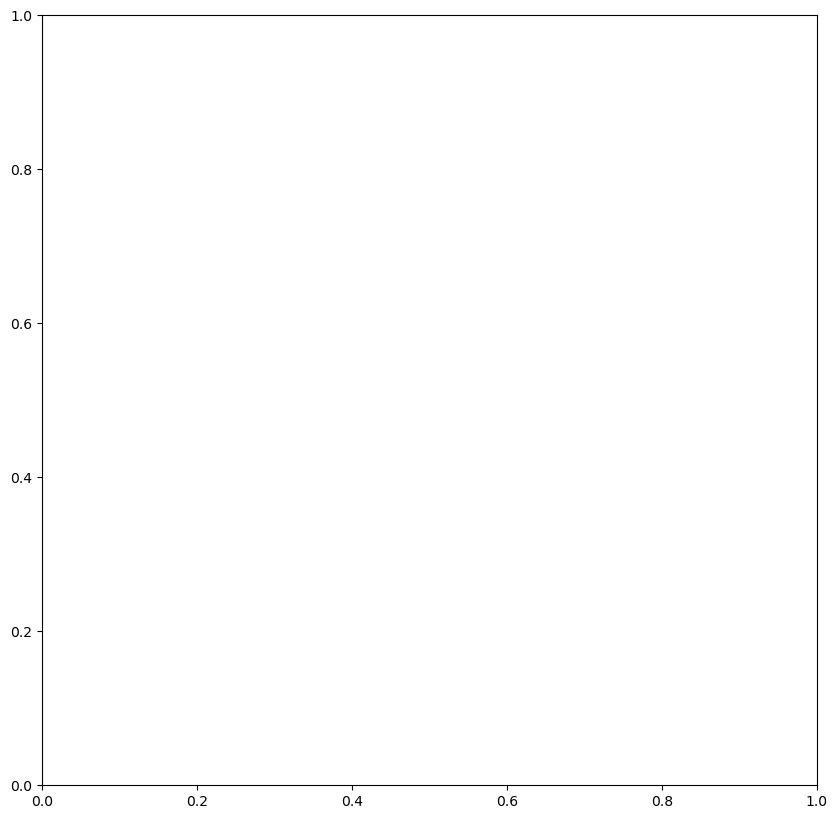

In [110]:
#WordCloud Visualizations
#Method for creating wordclouds
from PIL import Image
def display_cloud(data,img_path,color):
    plt.subplots(figsize=(10,10))
    mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                   mask=mask, background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42, width=mask.shape[1],
                   height=mask.shape[0])
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
display_cloud(train_df['Text'],'wordcloud.png','red')